# Image Processing Notebook

OpenCV is popular image processing library. It has wide variety of applications. Some of the popular applications are:
1. Pre-processing image
2. Detecting lines, circles, other shapes etc.
3. Edge detection
4. Image segmentation
5. Object Tracking

## OpenCV vs Deep Learning Library (Keras, Tensorflow etc)
In Deep Learning, the kernels are learned. You have done image classification, where we just initialise the kernel(filter). The kernels are learned during backpropagation.

In OpenCV, we define particular kernel for particular task. There is no backpropagation, so the value of kernel is not changed. You have seen the example of Edge Detection, where you define a specific value of kernel $\begin{bmatrix}
    1 & 0 & -1  \\
    1 & 0 & -1  \\
    1 & 0 & -1  
\end{bmatrix}$ for extracting the edges. 
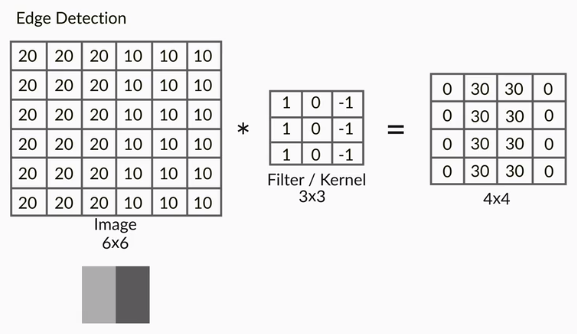

In [1]:
# Run these if OpenCV doesn't load

import sys
# sys.path.append('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cv2/')

First, we import the necessary libraries

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

### Function to plot multiple images 

In [3]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

In [4]:
# Here, we define some colours
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

### Simple edge detection example

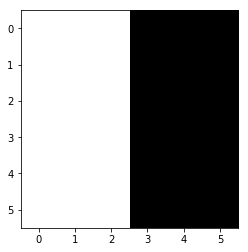

In [5]:
# image
image = np.array([[20,20,20,10,10,10], [20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10]],dtype=np.float32)
plt.imshow(image, cmap= 'gray')

In [6]:
#defining the kernel
kernel = np.array([[1,0,-1], [1,0,-1],[1,0,-1]],dtype=np.float32) 
kernel

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]], dtype=float32)

#### The function cv2.filter2D() in OpenCV does the convolution while preserving the image dimension.

[[ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]]


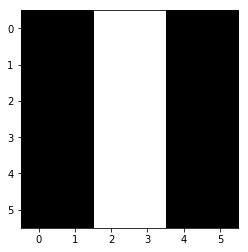

In [7]:
# The output we get after convolving image with filter
output = cv2.filter2D(image,-1,kernel)
print(output)
plt.imshow(output, cmap = 'gray')

## Edge detection example
Let's see one more example edge detection, that is 'canny' edge detection. It is an inbuilt funtion in OpenCV. You can read more it at https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

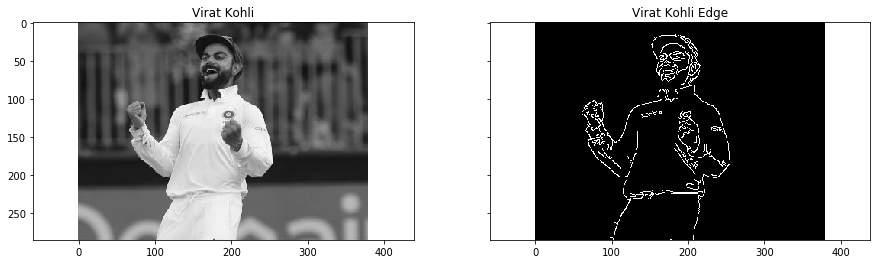

In [8]:
img = cv2.imread('virat1.jpg',0)
edges = cv2.Canny(img,100,200)
plot_image([img, edges], cmap='gray', captions = ["Virat Kohli", "Virat Kohli Edge"])

# Optical Character Recognition(OCR)
Here, you will see the process of extracting text from image. You will use OpenCV to preprocess the image and use open-source tesseract library to extract text from pre-processed image

In [9]:
# import the tesseract library
import pytesseract
# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd =r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

### Function to plot image with better aspect ratio

In [10]:
import matplotlib as mpl

def plotting(image, cmap = None):
    if cmap == 'gray':
        height, width = image.shape
    else:      
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape
        
    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)

    # Display the image.
    plt.imshow(image, cmap)
    

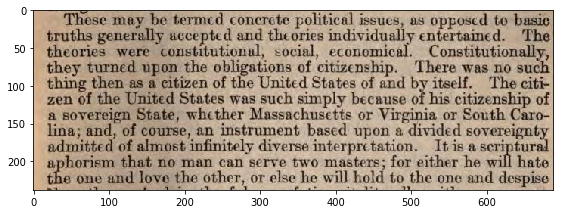

In [11]:
# Reading image and converting it into RGB
image = cv2.imread('image2.png')

plotting(image)

## Extracting text using OCR

In [12]:
text = pytesseract.image_to_string(image)
print(text)

These may be termed concrete political issues, as opposed to basic
truths generally accepted and theories iateeadaaly entertained. The
theories were constitutional, social, economical. Constitutionally,
they turned upon the obligations of citizenship. There was no such
thing then as a citizen of the United States of and by itself. The citi-
zen of the United States was such simply because of his citizenship of
a sovereign State, whether Massachusetts or Virginia or South Caro-
lina; and, of course, an instrument based upon a divided sovereignty
admitted of almost infinitely diverse interpretation. It is a scriptural
aphorism that no man can serve two masters; for either he will hate
the one and love the other, or else he will hold to the one and despise


### Was it easy? Let's take a difficult image and try to extract text

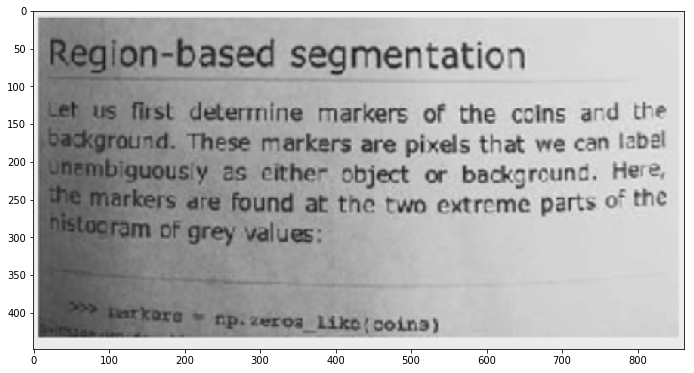

In [13]:
image = cv2.imread('text_bicubic_y.png')
plotting(image)

In [14]:
# Extracting text
text = pytesseract.image_to_string(image)
print(text)

line markers of the colns ard the

rs are pixels that we can label
Object or background. Here,
the two extreme parts of the


### Now that we are not able to extract text from image, let's try to improve the result using some pre-processing 

## Pre-processing techniques
You can improve the result by some of the following pre-processing techniques:
1. Increasing resolution: Increase the resolution of image
2. Deskewing: Deskew the image. It also makes it easier to do more processing.
3. Blurring: It is useful for removing noise. 
3. Convert to Black and White: Convert the image into black and white after deskewing and resizing. It will produce consistent character size and thickness.  
4. Remove Noise: Remove noise from black and white image. Perform operations like morphological transformation, contours etc. to remove the noise. 
5. Train Tesseract on the Font

### Converting to grayscale
Generally, we convert any colour image to grayscale for better perprocessing. 

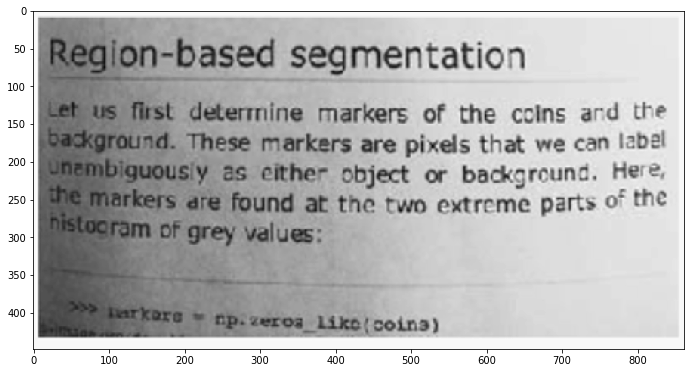

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plotting(gray, cmap = 'gray')

### Smoothening using blur
There is no need to do descrewing as the fonts are almost straight. The resolution of the image is also good. 

1. Gaussian Noise:
Gaussian Noise is modeled by adding random values to an image. Gaussian filter helps in removing Gaussian noise from the image.

2. Salt and Pepper Noise:
An image containing salt-and-pepper noise will have dark pixels in bright regions and bright pixels in dark regions. Median Filter helps in removing salt-and-pepper noise.

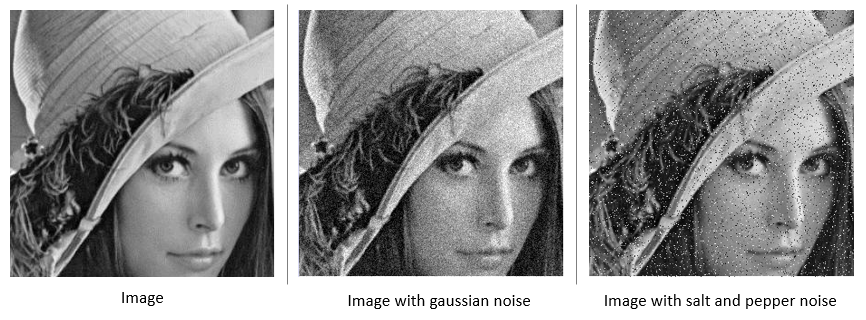

Let's blur the image for smoothing. https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

1. Gaussian blur
2. Median blur

#### Gaussin blur

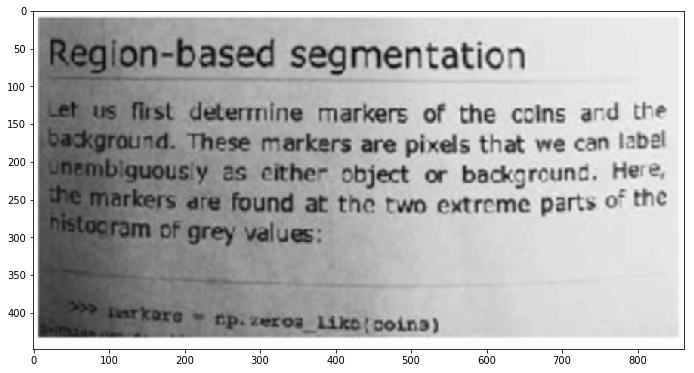

In [16]:
# Add some Gaussian Blur
gaussian = cv2.GaussianBlur(gray,(3,3),0)

#plotting
plotting(gaussian, cmap = 'gray')

#### Median blur

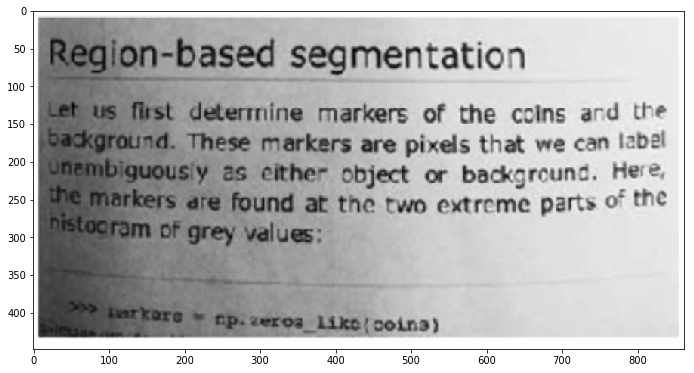

In [17]:
# Median Blur
median = cv2.medianBlur(gray,3)

#plotting
plotting(median, cmap = 'gray')

Here, there is not much difference between gaussian blur and median blur. 

#### Let's find the text output after bluring

In [18]:
text = pytesseract.image_to_string(median)

print(text)

ae _ of the coins and the
are pixels that we can label
ther object or background. Here,
J i the two extreme parts of the


#### You can see that the results have improved but still, the results are not that good. Let's do further preprocessing.

## Thresholding the image

The image after smoothing gets blurred. Generally, for OCR to work better, we want sharp borders between characters with high contrast. Binarization makes the image sharp. Also, it reduces the size of the image, which helps in preprocessing in OCR. Let's see some thresholding techniques:

1. Simple Thresholding
2. Adaptive Thresholding
3. Otsu’s Binarization

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

### Simple Thresholding

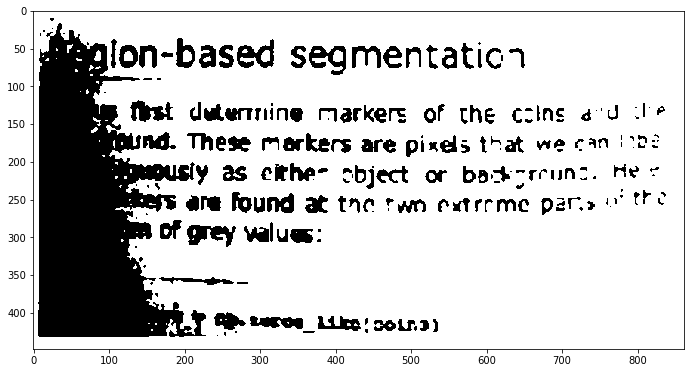

In [19]:
ret, simple_threshold = cv2.threshold(median,127,255,cv2.THRESH_BINARY)
plotting(simple_threshold, cmap = 'gray')

###  Adaptive Thresholding

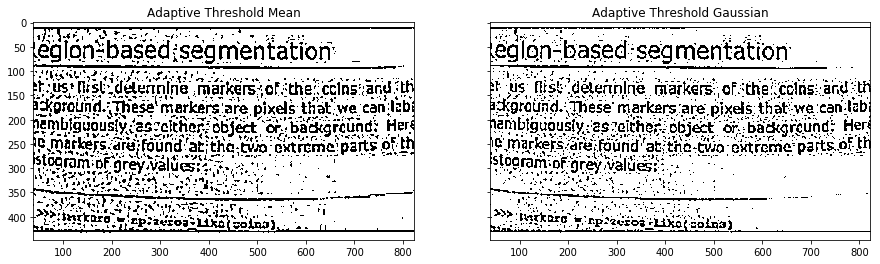

In [20]:
adaptive_threshold_mean = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
adaptive_threshold_gaussian = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plot_image([adaptive_threshold_mean, adaptive_threshold_gaussian], cmap='gray', captions = ["Adaptive Threshold Mean", "Adaptive Threshold Gaussian"])

###  Otsu's Thresholding

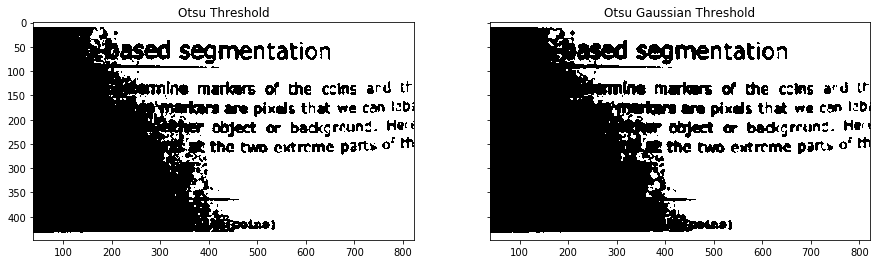

In [21]:
# Otsu's thresholding
ret2,otsu_threshold = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(median,(5,5),0)
ret3,otsu_gaussian_threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plot_image([otsu_threshold, otsu_gaussian_threshold], cmap='gray', captions = ["Otsu Threshold", "Otsu Gaussian Threshold"])

### Morphological transformations
Morphological transformations is normally performed on binary images. It needs two inputs, one is the image, other is structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. 
https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

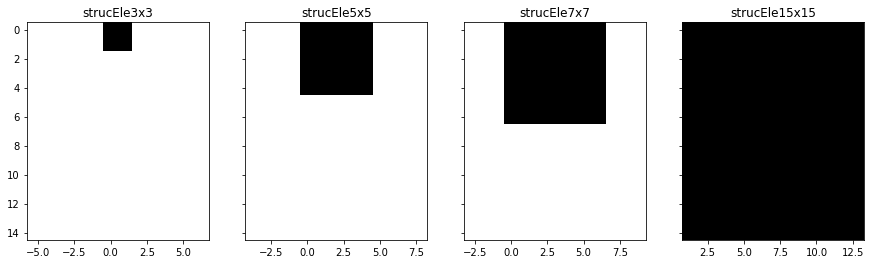

In [22]:
# Now, we define structuring elements

strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))        
strucEle15x15 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))

plot_image([strucEle3x3, strucEle5x5, strucEle7x7, strucEle15x15], cmap='gray', captions = ["strucEle3x3", "strucEle5x5", "strucEle7x7", "strucEle15x15"])

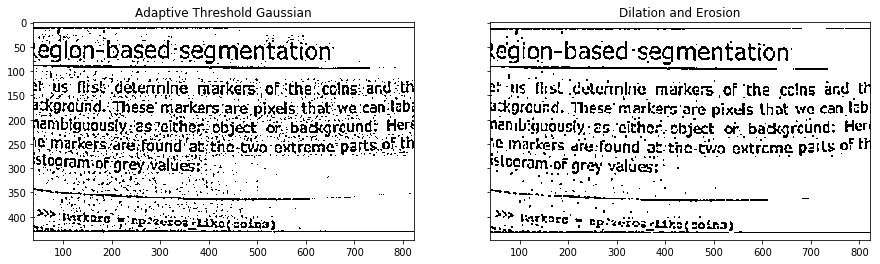

In [23]:
for i in range(2):
    imgThresh = cv2.dilate(adaptive_threshold_gaussian,strucEle3x3,iterations = 2)
    imgThresh = cv2.erode(imgThresh,strucEle3x3,iterations = 2)

plot_image([adaptive_threshold_gaussian, imgThresh], cmap='gray', captions = ["Adaptive Threshold Gaussian", "Dilation and Erosion"])            

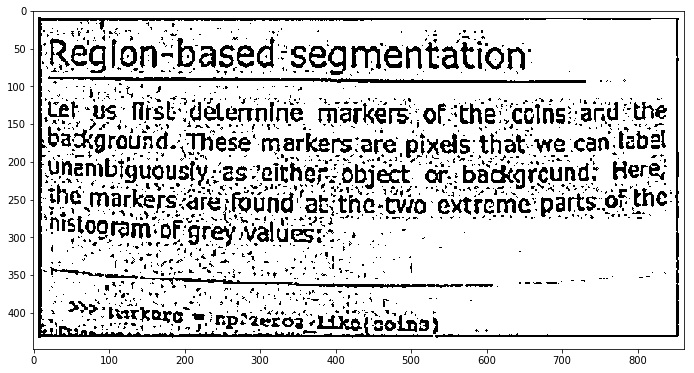

In [24]:
plotting(adaptive_threshold_gaussian, cmap = 'gray')

In [25]:
text = pytesseract.image_to_string(imgThresh)

print(text)

Region-based ‘segmentation _
Ler: us. thst ‘Celennine markers of ‘the cclns and the
Uaxtground. These markers‘are pixels that we can [bal
Unanibs guously, 2s either, Object of. backgrelind: Hera,

the markers dre: found ‘ab-the-two extreme paits ¢ of the:
*itooram: “OF grey v valdess* .

  

. > 4 harkera’ Rptaetos ais noina)
Lee 7 EP wrliketsoin |


#### If you perform more dilation and erosion, the characters will also detoriate. As you can see, because of dots, the result have deteroiated instead of improving 

## Contours
Contours is an outline representing or bounding the shape or form of something. It is a curve joining all the continuous points (along the boundary), having same color or intensity. Here, we will identify the shape of the dots using contours and remove it. Once we find all the shapes/contours, we will identify the dots which will have shapes having areas less than certain number, aspect ratio etc.  https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html

### Reverse the image
Generally, the object that we want to identify is in white and background is in black when using contours. So, revering the image to convert it in required format. 

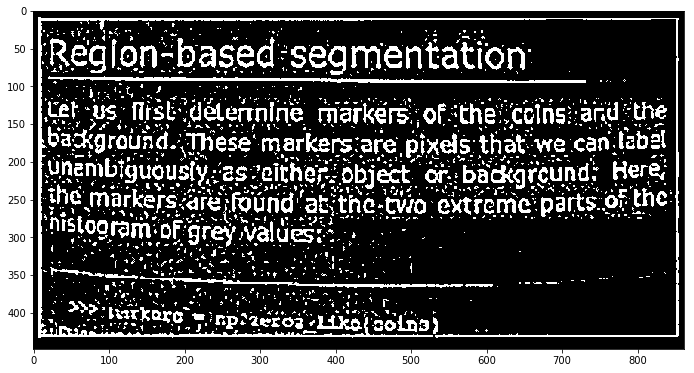

In [26]:
image_reverse = cv2.bitwise_not(adaptive_threshold_gaussian)
plotting(image_reverse, cmap = 'gray')

#### Function to draw and show contours

In [88]:
def drawAndShowContours(wd,ht,contours,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS
    
    # Defining a blank frame. Since it is initialised with zeros, it will be black
    blank_image = np.zeros((ht,wd), np.uint8)
    #cv2.drawContours(blank_image,contours,10,SCALAR_WHITE,-1)
    # Adding all possible contour to the blank frame 
    # Contour is white 
    cv2.drawContours(blank_image,contours,-1,SCALAR_WHITE,-1)
    
    #plt.imshow(blank_image, cmap = 'gray')
    # For better clarity, lets just view countour 9
    blank_image_contour_9 = np.zeros((ht,wd), np.uint8)
    
    # Let's just add contour 9th to the blank image and view it
    cv2.drawContours(blank_image_contour_9,contours,8,SCALAR_WHITE,-1)
    
    # Plotting
    plot_image([blank_image, blank_image_contour_9], cmap='gray', captions = ["All possible contours", "Only the 9th contour"])

        
    return blank_image

#### Finding all the possible contours in image and showing the contours. 

contours.shape: 1790


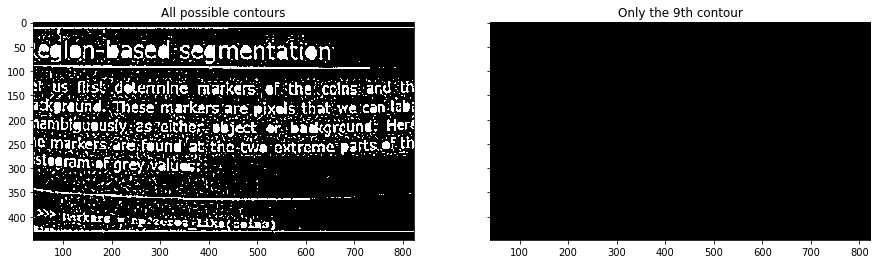

In [87]:
ht = np.size(image_reverse,0)
wd = np.size(image_reverse,1)

im, contours, hierarchy = cv2.findContours(image_reverse,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print ('contours.shape: ' + str(len(contours)))
im2 = drawAndShowContours(wd,ht,contours,'imgContours')

#### You can see that 1790 contours have been identified and we are plotting just the 9the contour which is a dot. Now, we have to remove all such dots. 

## Blob

#### Defining Blob class to store the properties of the contours such as centre of contour, aspect ratio, diagonal size etc. 

In [29]:
class Blob:
    currentContour = [[0,0]]
    
    # First, let's define the 'Blob' function, which creates a 'Blob', with all the necessary parameters
    
    def Blob(self,_contour):
        self.currentContour = _contour
        self.currentBoundingRect = cv2.boundingRect(_contour) 
        
        
    

#### Function to plot the Blob

In [30]:
def drawAndShowBlobs(wd,ht,blobs,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS
    blank_image = np.zeros((ht,wd,3), np.uint8)
    
    contours=[]
    for blob in blobs:
        contours.append(blob.currentContour)
    #print("C is", contours)  
    contours.pop(0)
    #print("contours ", contours)
    cv2.drawContours(blank_image,contours,-1,SCALAR_WHITE,-1)
    

    plt.imshow(blank_image, cmap = 'gray')
         
    return blank_image 

#### Finding the dots

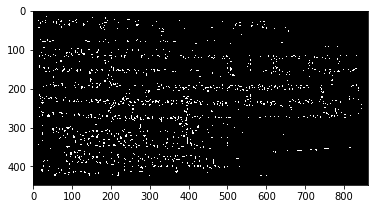

In [89]:
blob = Blob()
blobs = [blob]

area = 30

for contour in contours:
    # This is an instance of the class Blob()
    possiBlob = Blob()
    # This is the Blob function inside the class Blob()
    possiBlob.Blob(contour) # does it work? yes
    contourArea = cv2.contourArea(contour)
    if(contourArea < area):
        blobs.append(possiBlob)

# Now, using the hulls, we draw the blob objects.

dots = drawAndShowBlobs(wd,ht,blobs,'Blobs')

#### Image after removing the dots

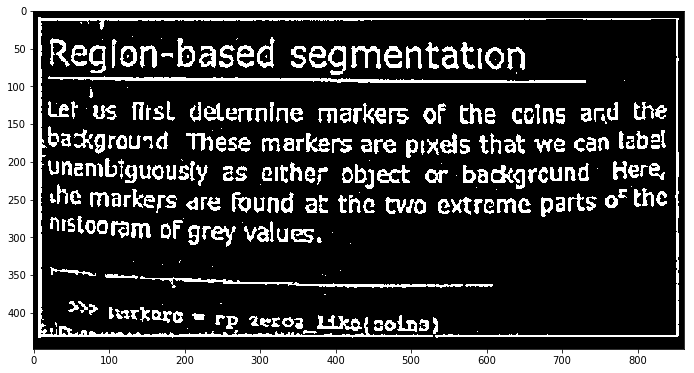

In [90]:
dots_ = cv2.cvtColor(dots, cv2.COLOR_BGR2GRAY)
imgDiff = cv2.absdiff(dots_, image_reverse)
plotting(imgDiff, cmap = 'gray')

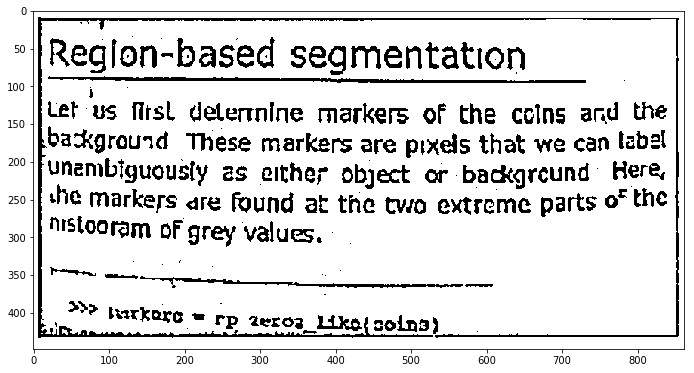

In [91]:
image_clean = cv2.bitwise_not(imgDiff)
plotting(image_clean, cmap = 'gray')

In [92]:
text = pytesseract.image_to_string(image_clean)

print(text)

Region-based segmentation

i
Let us first delermine markers of the cclns and the
background These markers are pixels that we can labal
unembiguously 2s either object or backgreund Here,

ihe markers are found at the two extreme parts of the
nstooram of grey values,


### You can see that results have greatly improved. But the results are not great as the text image itself had problems. 

## Another method
Let's use bilateral filter in the first stage itself and see the results. Sometimes the filters do not only dissolve the noise, but also smooth away the edges. To avoid this (at certain extent at least), we can use a bilateral filter.

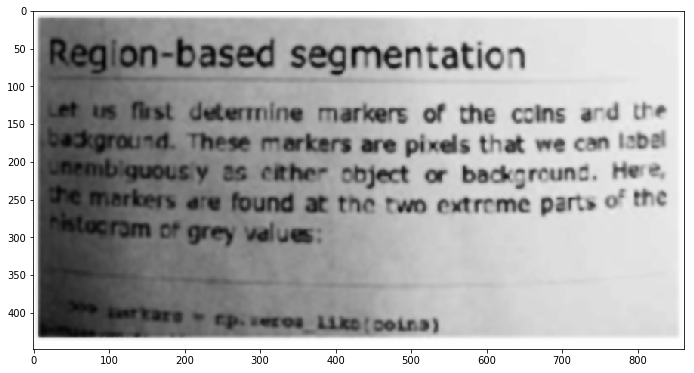

In [93]:
bilateral = cv2.bilateralFilter(gray,9,75,75)
#plotting
plotting(bilateral, cmap = 'gray')

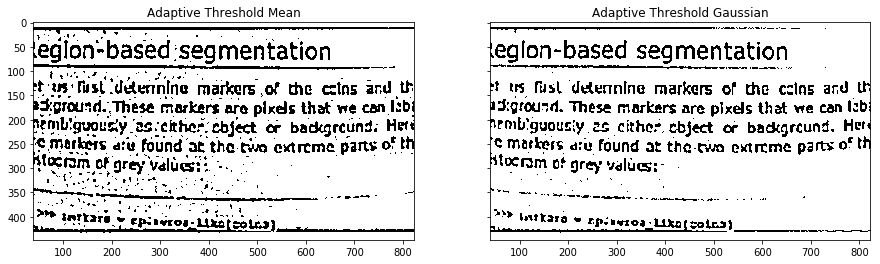

In [94]:
adaptive_threshold_mean = cv2.adaptiveThreshold(bilateral,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
adaptive_threshold_gaussian = cv2.adaptiveThreshold(bilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plot_image([adaptive_threshold_mean, adaptive_threshold_gaussian], cmap='gray', captions = ["Adaptive Threshold Mean", "Adaptive Threshold Gaussian"])

In [95]:
text = pytesseract.image_to_string(adaptive_threshold_gaussian)

print(text)

Reglon-based segmentation _

Let us fist determine markers of the ccins and the

tadground. These markers are pixels that we can label

Lnembiguousiy 2s ‘cither, chject or backgreund. Here,

‘he markets ae found at the. tw extreme parts of the:
Prtocrom ot grey values:

ON 8 ae A eM be neat amntieee imine ee

>> bar :
. wrkata © epcawros-Liks soins)
